In [5]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
!pip install pandas_datareader

In [16]:
#Get the stock quoate
df = web.DataReader('AAPL', data_source ='yahoo', start = '2013-01-01', end ='2022-09-17')
#Show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2013-01-02,19.821428,19.343929,19.779285,19.608213,560518000.0,16.890797
2013-01-03,19.631071,19.321428,19.567142,19.360714,352965200.0,16.677597
2013-01-04,19.236786,18.779642,19.177500,18.821428,594333600.0,16.213051
2013-01-07,18.903570,18.400000,18.642857,18.710714,484156400.0,16.117678
2013-01-08,18.996071,18.616072,18.900356,18.761070,458707200.0,16.161057
...,...,...,...,...,...,...
2022-09-12,164.259995,159.300003,159.589996,163.429993,104956000.0,163.429993
2022-09-13,160.539993,153.369995,159.899994,153.839996,122656600.0,153.839996
2022-09-14,157.100006,153.610001,154.789993,155.309998,87965400.0,155.309998


In [14]:
#Understanding data
df.shape

(2695, 6)

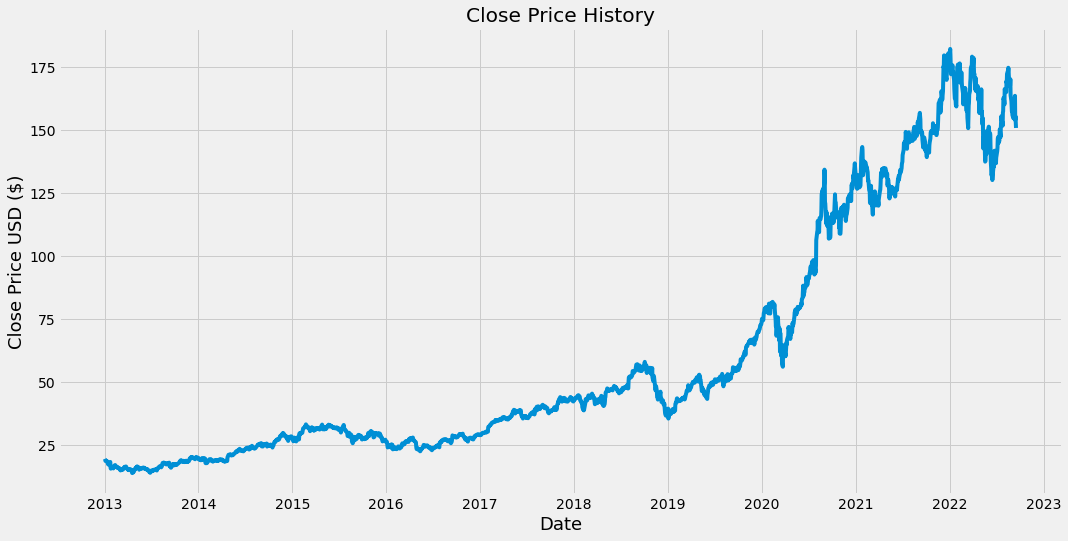

In [17]:
#Visulazing the data
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize = 18)
plt.show()

In [20]:
#Create a new Data frame 'Close Column'
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset)*.8)

training_data_len 


1956

In [23]:
#Scale the data(Normalizing the data helps the model)
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data 

array([[0.03368219],
       [0.03220953],
       [0.02900069],
       ...,
       [0.84113054],
       [0.82363704],
       [0.81370027]])

In [25]:
#Create the training dataset 
#create the scaled data set
train_data = scaled_data[0:training_data_len , :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=60:
        print(x_train)
        print(x_train)
        print()
        

[array([0.03368219, 0.03220953, 0.02900069, 0.02834192, 0.02864155,
       0.02689688, 0.02825905, 0.02757691, 0.02363492, 0.02027095,
       0.02455719, 0.02383254, 0.02326303, 0.02427668, 0.02624024,
       0.01274399, 0.01048717, 0.0126016 , 0.01439515, 0.01408915,
       0.01380439, 0.013407  , 0.01100568, 0.01430378, 0.01419965,
       0.01650959, 0.01794613, 0.01899803, 0.01644159, 0.01625246,
       0.01616321, 0.01479679, 0.01476066, 0.01239335, 0.01180045,
       0.01280986, 0.01110769, 0.01241885, 0.01148382, 0.01081018,
       0.00848749, 0.00627318, 0.00862986, 0.00746533, 0.00851086,
       0.00875312, 0.01006003, 0.00805397, 0.00803697, 0.00891888,
       0.01129044, 0.01385327, 0.01359189, 0.01307974, 0.01321787,
       0.01516868, 0.01552356, 0.01500505, 0.01307974, 0.01107794])]
[array([0.03368219, 0.03220953, 0.02900069, 0.02834192, 0.02864155,
       0.02689688, 0.02825905, 0.02757691, 0.02363492, 0.02027095,
       0.02455719, 0.02383254, 0.02326303, 0.02427668, 0.0

In [26]:
#Changing to see 61st variable
#Create the training dataset 
#create the scaled data set
train_data = scaled_data[0:training_data_len , :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=61:
        print(x_train)
        print(x_train)
        print()

[array([0.03368219, 0.03220953, 0.02900069, 0.02834192, 0.02864155,
       0.02689688, 0.02825905, 0.02757691, 0.02363492, 0.02027095,
       0.02455719, 0.02383254, 0.02326303, 0.02427668, 0.02624024,
       0.01274399, 0.01048717, 0.0126016 , 0.01439515, 0.01408915,
       0.01380439, 0.013407  , 0.01100568, 0.01430378, 0.01419965,
       0.01650959, 0.01794613, 0.01899803, 0.01644159, 0.01625246,
       0.01616321, 0.01479679, 0.01476066, 0.01239335, 0.01180045,
       0.01280986, 0.01110769, 0.01241885, 0.01148382, 0.01081018,
       0.00848749, 0.00627318, 0.00862986, 0.00746533, 0.00851086,
       0.00875312, 0.01006003, 0.00805397, 0.00803697, 0.00891888,
       0.01129044, 0.01385327, 0.01359189, 0.01307974, 0.01321787,
       0.01516868, 0.01552356, 0.01500505, 0.01307974, 0.01107794])]
[array([0.03368219, 0.03220953, 0.02900069, 0.02834192, 0.02864155,
       0.02689688, 0.02825905, 0.02757691, 0.02363492, 0.02027095,
       0.02455719, 0.02383254, 0.02326303, 0.02427668, 0.0

In [27]:
#Conver the X_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [29]:
#Reshape the data
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1896, 60, 1)

In [34]:
#Build as LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [35]:
#Compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [37]:
#trian the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1896/1896 [==============================] - 23s 12ms/step - loss: 2.4576e-04


In [40]:
#Create the testing data set
#Create a new array contaning scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 60:,:]

#Create the data sets x_train and y_train
x_test = []
y_test = dataset[training_data_len:,:]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])
    

In [41]:
#Convert the data into a numpy array
x_test =  np.array(x_test)

In [45]:
#Rehape the data
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [47]:
#get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

16/16 [==============================] - 0s 9ms/step


In [48]:
#Get the rmse error(RMSE)
rmse = np.sqrt(np.mean(predictions-y_test)**2)
rmse

5.357252702147439

C:\Users\josh1\AppData\Local\Temp/ipykernel_28100/2721521436.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']= predictions


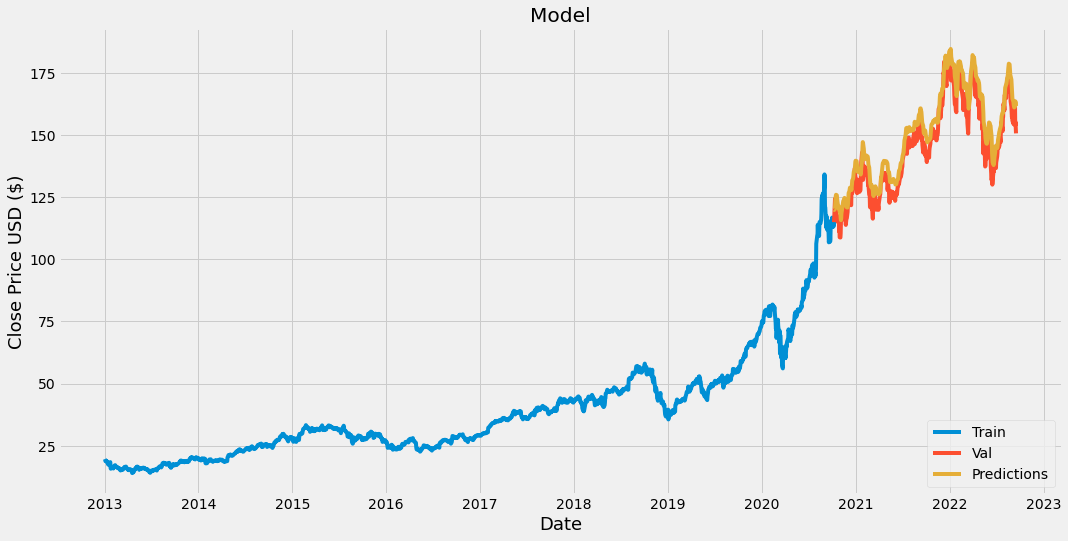

In [54]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions']= predictions
#Visulaize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize = 18)
plt.ylabel('Close Price USD ($)', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train','Val','Predictions'], loc = 'lower right')
plt.show()

In [55]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2020-10-08,114.970001,119.950996
2020-10-09,116.970001,119.871223
2020-10-12,124.400002,120.312622
2020-10-13,121.099998,122.612846
2020-10-14,121.190002,124.302864
...,...,...
2022-09-12,163.429993,161.522903
2022-09-13,153.839996,163.628601
2022-09-14,155.309998,163.476685


In [63]:
apple_quote = web.DataReader('AAPL' ,data_source='yahoo',  start = '2012-01-01', end ='2019-12-17')
#Create a new data frame
new_df = apple_quote.filter(['Close'])
#Get the last 60 day closing price values and convert the data frame to an array
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 an 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append the past 60 days to the X_test list
X_test.append(last_60_days_scaled)
#Conver the X_test data set to a numpy array
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
#Get the predicted price
pred_price = model.predict(X_test)
#Undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

1/1 [==============================] - 0s 15ms/step
[[70.73147]]


In [62]:
apple_quote2 = web.DataReader('AAPL' ,data_source='yahoo',  start = '2019-12-18', end ='2019-12-18')
apple_quote2

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-18,70.474998,69.779999,69.949997,69.934998,116028400,68.627411


In [64]:
print(apple_quote2['Close'])

Date
2019-12-18    69.934998
Name: Close, dtype: float64
